# Week 4 Assignment: Trying Out OSMnx Isochrone Mapping
For this assignment, I will be reloading the traffic collision data that my partner and I cleaned up and use it to try out the isochrone mapping from our last class.

## Part 1: Loading cleaned-up bike collision data
The CSV for [LAPD's traffic collision data from 2010 to present](https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w) has been filtered to only include reported traffic collisions involving bikes. For each entry with a lat,long coordinates of "0,0", we have manually gone in to search up lat,long coordinates based on the "Address" (first street) and "Cross Street" (second intersecting street) provided. For entries that have neither lat,long coordinates nor "Address" and "Cross Street" . We created a [Google Doc documenting the process of cleaning up each affected entry](https://docs.google.com/document/d/1Iec81ZXlTOaoUa1vZBHPScEr9pMDE6vaom-cJ_Azbgw/edit?usp=sharing).

I used [a website that converts CSV files to GEOJSON](https://www.convertcsv.com/csv-to-geojson.htm). I will first load both files and pull sample entries from the data to test that they have been loaded properly.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
csv = gpd.read_file('3 Bike Traffic Accident Data (Re-Cleaned) copy BL.csv')

In [3]:
csv.head()

DR Number Date Reported Date Occurred Time Occurred Area ID  Area Name  \
0  190617851       8/24/19       8/24/19          1115       6  Hollywood   
1  190715500       8/22/19       8/21/19          2230       7   Wilshire   
2  190715796       8/27/19       8/27/19          1420       7   Wilshire   
3  190814721       8/22/19       8/22/19          1730       8    West LA   
4  190814726       8/20/19       8/20/19           825       8    West LA   

  Reporting District Crime Code Crime Code Description MO Codes  ...  \
0                615        997      TRAFFIC COLLISION     3008  ...   
1                727        997      TRAFFIC COLLISION     3008  ...   
2                745        997      TRAFFIC COLLISION     3008  ...   
3                842        997      TRAFFIC COLLISION     3008  ...   
4                851        997      TRAFFIC COLLISION     3008  ...   

  Victim Descent Premise Code Premise Description  \
0              W          101              STREET   
1              H          101              STREET   
2              O          101              STREET   
3              W          101              STREET   
4              A          101              STREET   

                           Address                     Cross Street      Lat  \
0  BARHAM                       BL  WINNIE                       DR  34.1347   
1  BEVERLY                      BL  LA BREA                      AV  34.0762   
2  LA BREA                      AV  SYCAMORE                     AV  34.0562   
3  SANTA MONICA                 BL  BARRINGTON                   AV  34.0465   
4  BROCKTON                     AV  SANTA MONICA                 BL  34.0398   

        Long Latitude  Longitude geometry  
0  -118.3427  34.1347  -118.3427     None  
1  -118.3441  34.0762  -118.3441     None  
2  -118.3449  34.0562  -118.3449     None  
3  -118.4588  34.0465  -118.4588     None  
4  -118.4598  34.0398  -118.4598     None  

[5 rows x 22 columns]

In [4]:
csv.sample()

DR Number Date Reported Date Occurred Time Occurred Area ID Area Name  \
3086  140904133      01-03-14      01-03-14          1840       9  Van Nuys   

     Reporting District Crime Code Crime Code Description MO Codes  ...  \
3086                914        997      TRAFFIC COLLISION     3008  ...   

     Victim Descent Premise Code Premise Description  \
3086              B          101              STREET   

                              Address                     Cross Street  \
3086  VAN NUYS                     BL  HARTLAND                     ST   

          Lat       Long Latitude  Longitude geometry  
3086  34.1952  -118.4487  34.1952  -118.4487     None  

[1 rows x 22 columns]

In [5]:
geo = gpd.read_file('3 Bike Traffic Accident Data (Re-Cleaned) copy BL.geojson')

In [6]:
geo.head()

DR Number Date Reported Date Occurred  Time Occurred  Area ID  Area Name  \
0  190617851       8/24/19       8/24/19           1115        6  Hollywood   
1  190715500       8/22/19       8/21/19           2230        7   Wilshire   
2  190715796       8/27/19       8/27/19           1420        7   Wilshire   
3  190814721       8/22/19       8/22/19           1730        8    West LA   
4  190814726       8/20/19       8/20/19            825        8    West LA   

   Reporting District  Crime Code Crime Code Description  MO Codes  \
0                 615         997      TRAFFIC COLLISION      3008   
1                 727         997      TRAFFIC COLLISION      3008   
2                 745         997      TRAFFIC COLLISION      3008   
3                 842         997      TRAFFIC COLLISION      3008   
4                 851         997      TRAFFIC COLLISION      3008   

   Victim Age Victim Sex Victim Descent  Premise Code Premise Description  \
0        52.0          M              W         101.0              STREET   
1        24.0          F              H         101.0              STREET   
2        46.0          M              O         101.0              STREET   
3        32.0          M              W         101.0              STREET   
4        24.0          M              A         101.0              STREET   

                           Address                     Cross Street  Latitude  \
0  BARHAM                       BL  WINNIE                       DR   34.1347   
1  BEVERLY                      BL  LA BREA                      AV   34.0762   
2  LA BREA                      AV  SYCAMORE                     AV   34.0562   
3  SANTA MONICA                 BL  BARRINGTON                   AV   34.0465   
4  BROCKTON                     AV  SANTA MONICA                 BL   34.0398   

   Longitude                     geometry  
0  -118.3427  POINT (-118.34270 34.13470)  
1  -118.3441  POINT (-118.34410 34.07620)  
2  -118.3449  POINT (-118.34490 34.05620)  
3  -118.4588  POINT (-118.45880 34.04650)  
4  -118.4598  POINT (-118.45980 34.03980)

In [7]:
geo.sample()

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
4149  151313615       6/25/15       6/24/15           1840       13    Newton   

      Reporting District  Crime Code Crime Code Description  MO Codes  \
4149                1342         997      TRAFFIC COLLISION      3008   

      Victim Age Victim Sex Victim Descent  Premise Code Premise Description  \
4149        21.0          M              H         101.0              STREET   

                              Address                     Cross Street  \
4149  SAN PEDRO                    ST  MARTIN LUTHER KING JR        BL   

      Latitude  Longitude                     geometry  
4149   34.0112   -118.268  POINT (-118.26800 34.01120)

The data looks good! Let's now plot the GEOJSON file.

<AxesSubplot:>

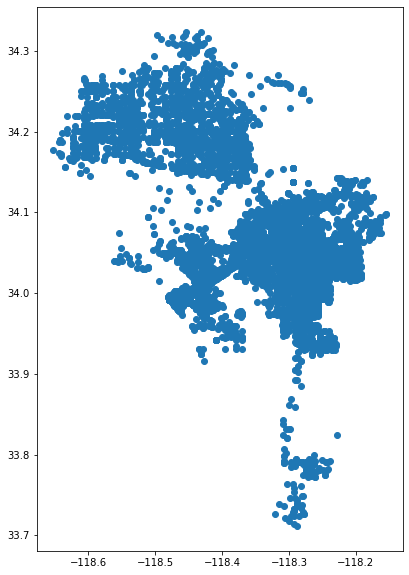

In [8]:
geo.plot(figsize=(10,10))

We want to differentiate the different MO (Modus Operandi) codes that LAPD uses to classify different types of traffic collisions.

<AxesSubplot:>

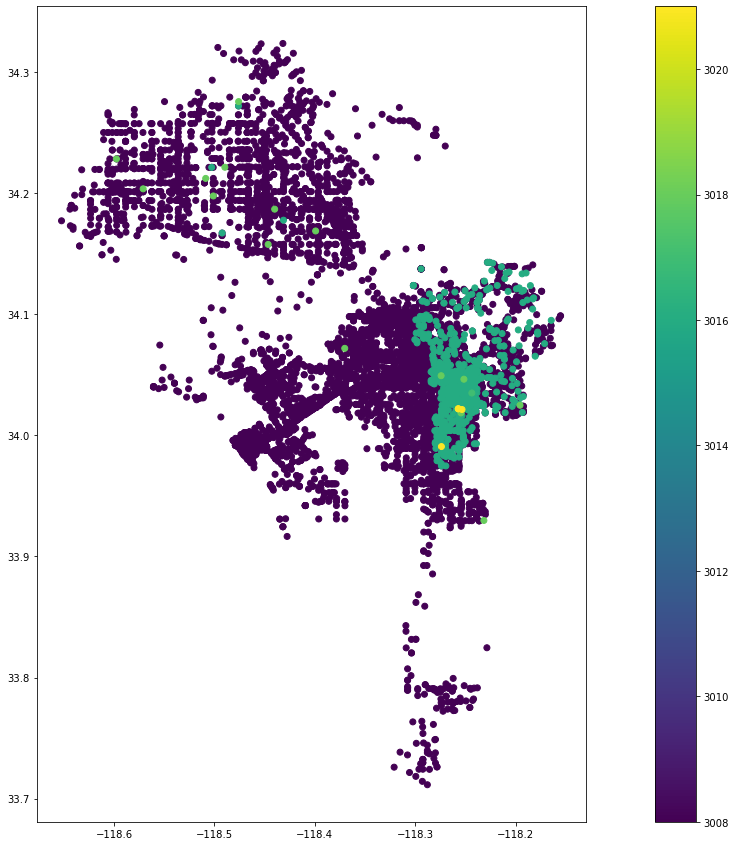

In [9]:
geo.plot(
            figsize= (25,15), 
            column = 'MO Codes',
            legend = True
            )

Interesting! Is there a geospatial element or reasoning for certain MO codes to be confined to specific parts of the city? We'll have to investigate this further in the coming weeks. Our initial assumption was that MO codes were simply categories for different types of traffic collisions, so we would expect there to be no geographic pattern to different MO codes being in certain parts of the city (aka different colors would be spread out and intermixed across the city).

To sort this, we will use the df.groupby() function to count by each different MO code.

In [10]:
geo.groupby(['MO Codes'])['MO Codes'].count()

MO Codes
3008    8052
3016     672
3017       1
3018      15
3021       4
Name: MO Codes, dtype: int64

When we look up the MO Codes Directory provided by LAPD, we find the following traffic collision types: 
* 3008: Vehicle vs Bike
* 3016: Bike vs Vehicle
* 3017: Bike vs Train
* 3018: Bike vs Other
* 3021: Train vs Bike

As we can see from the plot and the MO Codes, the vast majority of collision types are between (motor) vehicles and bicycles. 

Now, let's load some more libraries to create a basemap and clean up the plot.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#loading mercator projection from Open Street Maps (OSM)
osm_web_mercator = geo.to_crs(epsg=3857)

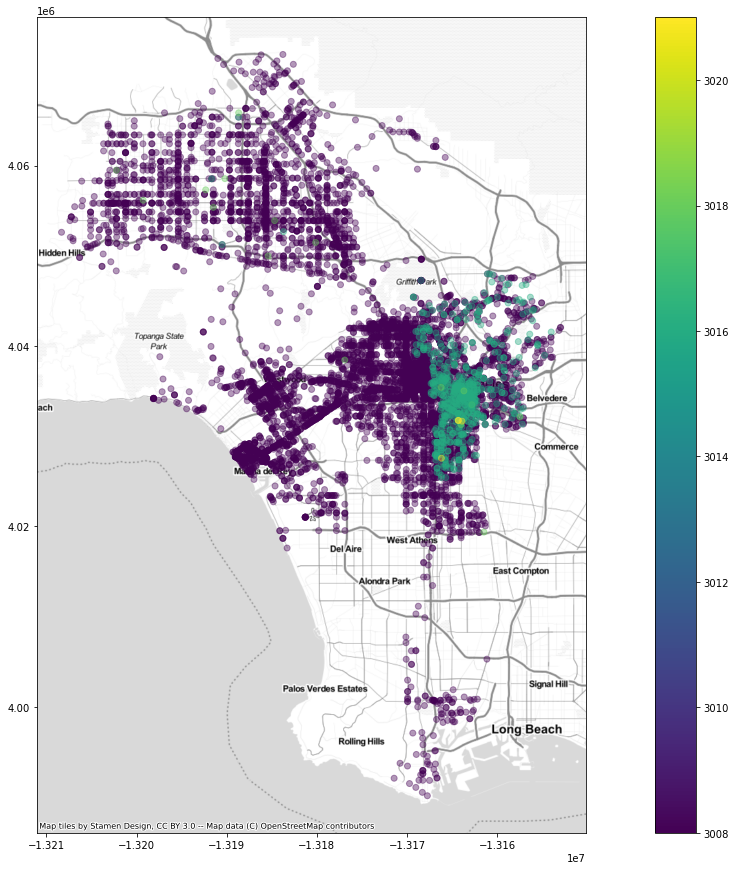

In [13]:
fig,ax = plt.subplots(figsize=(25,15))
osm_web_mercator.plot(ax=ax,
                    column = 'MO Codes',
                    legend = True,
                    alpha = 0.4,
                   )

# loading a basemap that has relatively clean mapping of LA
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

The order of the two parties might indicate who's at fault (e.g. Vehicle vs Bike meaning the vehicle was the offending party), but this doesn't indicate why Bike vs Vehicle seems to be geographically limited to east of the 110 Freeway. Another possibly more likely scenario is that different LAPD districts or jurisdictions that happen to be divided by the 110 Freeway are used to using either code with no distinction of who's at fault, thereby making these two distinct codes arbitrary. In any case, unless we run into more information we cannot assume any distinction between "Vehicle vs Bike" and "Bike vs Vehicle".

## Part 2: Loading up isochrone mapping with our group data

Based on the plot we just created, I want to test out the isochrone mapping for a neighborhood with a lot of traffic collisions. There's a lot to choose from, but I'll start with the area around North Hollywood subway station (lat/long approximately 4.05e6,-1.3175 based on eyeballing of previous map)

In [14]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

For the trip times around NoHo station, I'll use the low estimate of 15 km/h or 15000 m/h bike speed. When divided by 60 minutes, this converts to 250 m per min.

In [15]:
# configure the place, network type, trip times, and travel speed
address = 'North Hollywood Station, Los Angeles, CA, USA'
network_type = 'bike'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 250 # travel distance per minute, 

In [16]:
%%time
NoHo = ox.graph_from_address(address, network_type=network_type, dist = 3000)

CPU times: user 5.99 s, sys: 104 ms, total: 6.09 s
Wall time: 6.1 s


In [17]:
type(NoHo)

networkx.classes.multidigraph.MultiDiGraph

Let's visualize the power of OSMnx's node mapping!

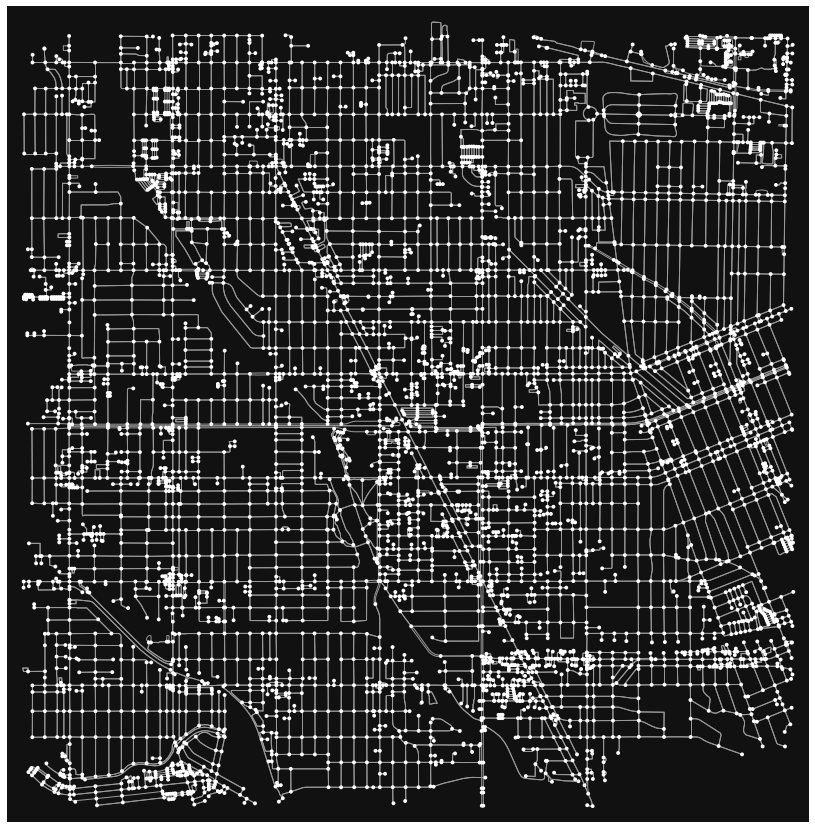

In [18]:
fig, ax = ox.plot_graph(NoHo, figsize = (15,15))

This looks neat! It kind of looks like a computer circuit board. Now let's project to web mercator and convert this into geodataframes.

### Project to Web Mercator + Convert edges and nodes to geodataframes

In [19]:
NoHo = ox.project_graph(NoHo, to_crs='epsg:3857')

In [20]:
nh_nodes, nh_edges = ox.graph_to_gdfs(NoHo)

In [21]:
nh_nodes.sample(5)

y             x  street_count         lon        lat  \
osmid                                                                         
123362354   4.048524e+06 -1.318069e+07             4 -118.404151  34.146749   
6735382761  4.053896e+06 -1.317720e+07             3 -118.372826  34.186680   
20842274    4.053802e+06 -1.317595e+07             4 -118.361577  34.185979   
725265713   4.054288e+06 -1.317719e+07             1 -118.372697  34.189590   
8732400190  4.051797e+06 -1.317868e+07             1 -118.386113  34.171079   

                    highway                           geometry  
osmid                                                           
123362354               NaN  POINT (-13180689.853 4048523.934)  
6735382761              NaN  POINT (-13177202.759 4053896.272)  
20842274    traffic_signals  POINT (-13175950.515 4053801.830)  
725265713    turning_circle  POINT (-13177188.365 4054287.789)  
8732400190              NaN  POINT (-13178681.861 4051796.967)

In [22]:
nh_nodes

y             x  street_count         lon        lat  \
osmid                                                                         
14941175    4.052037e+06 -1.317459e+07             3 -118.349396  34.172860   
4048147636  4.051884e+06 -1.317453e+07             3 -118.348852  34.171726   
1897857617  4.052256e+06 -1.317459e+07             3 -118.349354  34.174489   
1897857621  4.052220e+06 -1.317467e+07             4 -118.350093  34.174222   
14941178    4.054371e+06 -1.317455e+07             3 -118.349015  34.190210   
...                  ...           ...           ...         ...        ...   
8994789449  4.050472e+06 -1.317734e+07             1 -118.374088  34.161231   
9357379973  4.051330e+06 -1.317435e+07             1 -118.347188  34.167612   
9371262853  4.048788e+06 -1.317693e+07             3 -118.370389  34.148709   
9371262854  4.048787e+06 -1.317695e+07             1 -118.370568  34.148708   
9371262856  4.048864e+06 -1.317695e+07             1 -118.370567  34.149281   

                    highway                           geometry  
osmid                                                           
14941175                NaN  POINT (-13174594.554 4052036.612)  
4048147636              NaN  POINT (-13174533.907 4051884.060)  
1897857617              NaN  POINT (-13174589.823 4052255.742)  
1897857621              NaN  POINT (-13174672.099 4052219.857)  
14941178    traffic_signals  POINT (-13174552.052 4054371.240)  
...                     ...                                ...  
8994789449              NaN  POINT (-13177343.244 4050471.998)  
9357379973              NaN  POINT (-13174348.738 4051330.462)  
9371262853              NaN  POINT (-13176931.417 4048787.533)  
9371262854              NaN  POINT (-13176951.355 4048787.385)  
9371262856              NaN  POINT (-13176951.243 4048864.460)  

[5450 rows x 7 columns]

<AxesSubplot:>

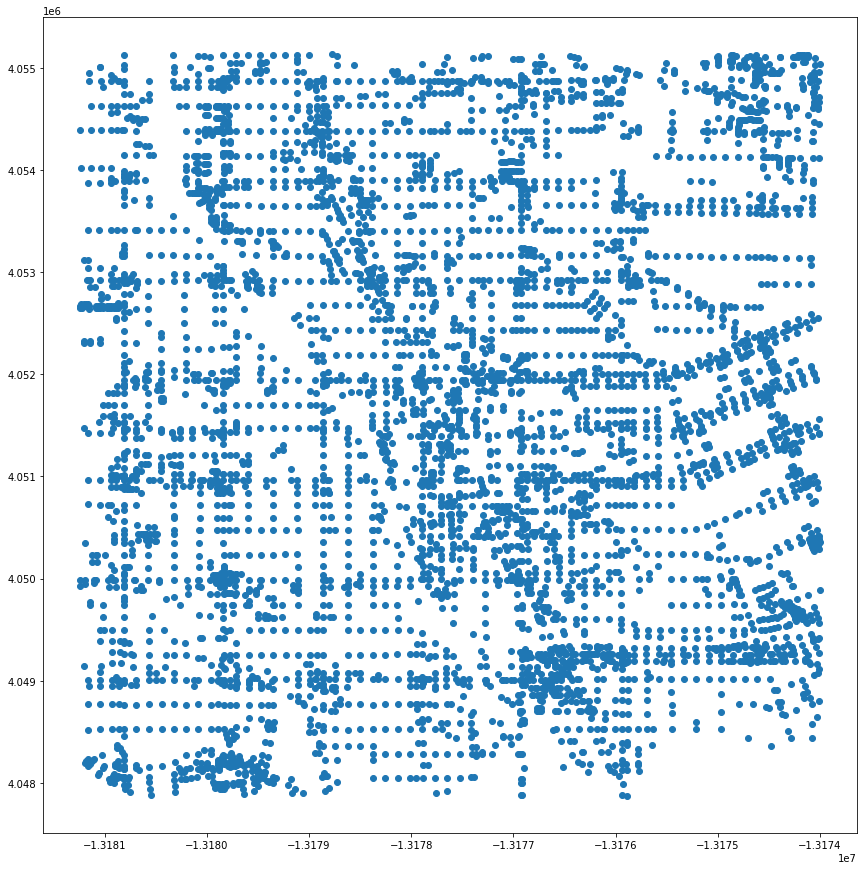

In [23]:
nh_nodes.plot(figsize = (15,15))

In [24]:
nh_edges.tail()

osmid             name    highway  \
u          v          key                                                       
9357379973 9357379972 0                1014251819              NaN    service   
9371262853 4085508941 0    [406489026, 406488972]  Vineland Avenue  secondary   
           9371262854 0                1015982523              NaN    service   
9371262854 9371262853 0                1015982523              NaN    service   
9371262856 9371262855 0                1015982524              NaN    service   

                           oneway  length  \
u          v          key                   
9357379973 9357379972 0     False  32.653   
9371262853 4085508941 0      True  70.066   
           9371262854 0     False  16.481   
9371262854 9371262853 0     False  16.481   
9371262856 9371262855 0     False  16.730   

                                                                    geometry  \
u          v          key                                                      
9357379973 9357379972 0    LINESTRING (-13174348.738 4051330.462, -131743...   
9371262853 4085508941 0    LINESTRING (-13176931.417 4048787.533, -131769...   
           9371262854 0    LINESTRING (-13176931.417 4048787.533, -131769...   
9371262854 9371262853 0    LINESTRING (-13176951.355 4048787.385, -131769...   
9371262856 9371262855 0    LINESTRING (-13176951.243 4048864.460, -131769...   

                          access tunnel maxspeed        service lanes bridge  
u          v          key                                                     
9357379973 9357379972 0      NaN    NaN      NaN  parking_aisle   NaN    NaN  
9371262853 4085508941 0      NaN    NaN   40 mph            NaN     2    NaN  
           9371262854 0      NaN    NaN      NaN       driveway   NaN    NaN  
9371262854 9371262853 0      NaN    NaN      NaN       driveway   NaN    NaN  
9371262856 9371262855 0      NaN    NaN      NaN       driveway   NaN    NaN

In [25]:
nh_edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 14766 entries, (14941175, 4048147636, 0) to (9371262856, 9371262855, 0)
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     14766 non-null  object  
 1   name      9152 non-null   object  
 2   highway   14766 non-null  object  
 3   oneway    14766 non-null  bool    
 4   length    14766 non-null  float64 
 5   geometry  14766 non-null  geometry
 6   access    665 non-null    object  
 7   tunnel    31 non-null     object  
 8   maxspeed  1556 non-null   object  
 9   service   2511 non-null   object  
 10  lanes     1465 non-null   object  
 11  bridge    34 non-null     object  
dtypes: bool(1), float64(1), geometry(1), object(9)
memory usage: 1.7+ MB


<AxesSubplot:>

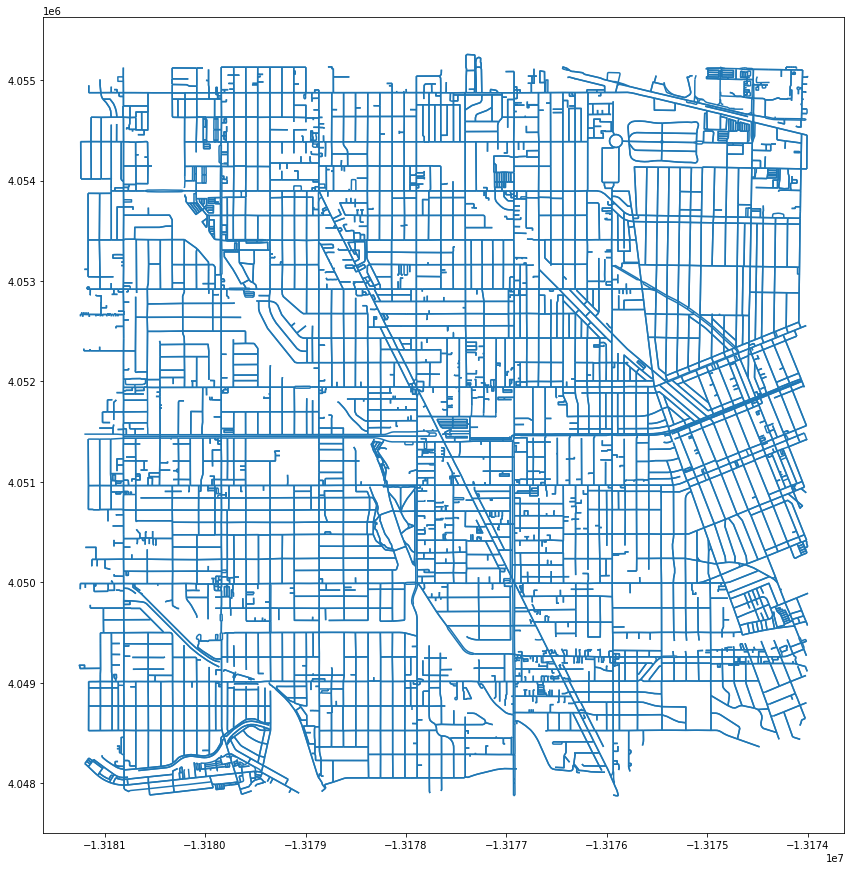

In [26]:
nh_edges.plot(figsize = (15,15))

In [27]:
nh_edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential               5940
service                   5370
secondary                 2042
primary                    765
tertiary                   336
path                       150
cycleway                    50
[residential, service]      36
unclassified                27
[residential, path]         14
busway                      13
secondary_link              12
[secondary, primary]         4
tertiary_link                3
[service, path]              2
[path, cycleway]             2
Name: highway, dtype: int64

In [28]:
# Calculate network statistics
stats = ox.basic_stats(NoHo, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 5450,
 'm': 14766,
 'k_avg': 5.4187155963302756,
 'edge_length_total': 1191916.7620000015,
 'edge_length_avg': 80.72035500474072,
 'streets_per_node_avg': 2.833394495412844,
 'streets_per_node_counts': {0: 0,
  1: 1022,
  2: 58,
  3: 3199,
  4: 1153,
  5: 13,
  6: 5},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.18752293577981652,
  2: 0.010642201834862385,
  3: 0.5869724770642202,
  4: 0.21155963302752293,
  5: 0.0023853211009174312,
  6: 0.0009174311926605505},
 'intersection_count': 4428,
 'street_length_total': 616710.3920000015,
 'street_segment_count': 7643,
 'street_length_avg': 80.68957111082055,
 'circuity_avg': 0.8621173963853805,
 'self_loop_proportion': 0.0023550961664267956}

Now let's get the centroid and network layers.

In [29]:
minx, miny, maxx, maxy = nh_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13181242.643117
4047874.693919057
-13173996.601426437
4055130.9297218765


In [30]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13177619.622271718
4051502.811820467


In [31]:
# use osmnx's distance.nearest_nodes command to get the id for the nearest node
center_node = ox.distance.nearest_nodes(NoHo,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 7103976662


In [32]:
nh_nodes.loc[[center_node]]

y             x  street_count         lon       lat  \
osmid                                                                        
7103976662  4.051496e+06 -1.317761e+07             1 -118.376505  34.16884   

           highway                           geometry  
osmid                                                  
7103976662     NaN  POINT (-13177612.214 4051495.707)

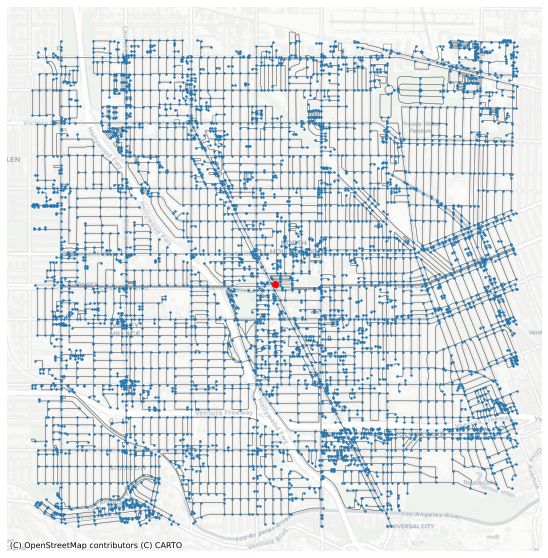

In [33]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
nh_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
nh_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
nh_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

## Creating isochrones

let's now create the 10 minute biking map around North Hollywood station.

First we create the bike time column.

In [34]:
nh_edges[['osmid','name','highway','length']].sample(5)

osmid             name      highway   length
u          v          key                                                  
4818951813 4818951811 0    489673429              NaN      service   25.861
123194776  123194779  0     13383908       Ben Avenue  residential  189.078
358071909  8318073565 0     31964027              NaN      service   33.762
6441834947 6441834945 0    687259393              NaN      service   93.203
4807980690 4807980698 0     13400876  Archwood Street  residential   20.989

In [35]:
nh_edges['bike_time'] = nh_edges['length']/meters_per_minute

In [36]:
nh_edges[['osmid','name','highway','length','bike_time']].sample(5)

osmid             name      highway   length  \
u          v          key                                                     
123163326  6419903653 0    136917791   Radford Avenue     tertiary  146.211   
1917629437 122840507  0     13323716    Arcola Avenue  residential   49.560   
8448652124 7883919690 0    405336718  Whitsett Avenue    secondary   82.985   
358077125  7764333186 0     31964246              NaN      service   60.119   
7936467512 7936467513 0    850734164              NaN      service   13.342   

                           bike_time  
u          v          key             
123163326  6419903653 0     0.584844  
1917629437 122840507  0     0.198240  
8448652124 7883919690 0     0.331940  
358077125  7764333186 0     0.240476  
7936467512 7936467513 0     0.053368

Next we create a color map (cmap) for our isochrone:

In [37]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [38]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [39]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [40]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


Now we will color the nodes based on travel time from NoHo station.

In [41]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(NoHo, center_node, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        nh_nodes.loc[node,'time'] = str(time) + ' mins'
        nh_nodes.loc[node,'color'] = color

There are 877 nodes within 20 minutes 
There are 329 nodes within 15 minutes 
There are 73 nodes within 10 minutes 
There are 12 nodes within 5 minutes 


In [42]:
nh_nodes.sample(10)

y             x  street_count         lon        lat  \
osmid                                                                         
5084057517  4.051164e+06 -1.317824e+07             3 -118.382178  34.166372   
6853062287  4.051887e+06 -1.317551e+07             3 -118.357595  34.171748   
122940798   4.051183e+06 -1.317478e+07             4 -118.351029  34.166517   
7199962128  4.051571e+06 -1.317682e+07             1 -118.369427  34.169400   
8178681902  4.050502e+06 -1.318058e+07             1 -118.403170  34.161451   
3695609335  4.054424e+06 -1.317619e+07             3 -118.363730  34.190601   
7056822455  4.049645e+06 -1.317419e+07             3 -118.345763  34.155083   
7153005585  4.053021e+06 -1.317984e+07             3 -118.396517  34.180176   
123042681   4.053114e+06 -1.317667e+07             3 -118.368065  34.180864   
123364364   4.051435e+06 -1.318002e+07             3 -118.398156  34.168391   

           highway                           geometry     time    color  
osmid                                                                    
5084057517     NaN  POINT (-13178243.807 4051163.604)  20 mins  #0d0887  
6853062287     NaN  POINT (-13175507.251 4051886.899)      NaN      NaN  
122940798      NaN  POINT (-13174776.239 4051183.153)      NaN      NaN  
7199962128     NaN  POINT (-13176824.295 4051571.092)  15 mins  #9c179e  
8178681902     NaN  POINT (-13180580.626 4050501.608)      NaN      NaN  
3695609335     NaN  POINT (-13176190.174 4054423.874)      NaN      NaN  
7056822455     NaN  POINT (-13174190.019 4049644.969)      NaN      NaN  
7153005585     NaN  POINT (-13179839.984 4053020.942)      NaN      NaN  
123042681      NaN  POINT (-13176672.733 4053113.520)      NaN      NaN  
123364364      NaN  POINT (-13180022.426 4051435.243)  20 mins  #0d0887

In [43]:
# the NaN values then need to be populated with a valid color
nh_nodes['color'].fillna('#cccccc', inplace=True)

In [44]:
#ensure all values, including NaN values, include a color
nh_nodes.sample(10)

y             x  street_count         lon        lat  \
osmid                                                                         
6845572172  4.051464e+06 -1.317692e+07             4 -118.370307  34.168604   
6726049026  4.049583e+06 -1.317423e+07             3 -118.346126  34.154625   
6746455085  4.050810e+06 -1.317771e+07             3 -118.377403  34.163744   
123333120   4.048142e+06 -1.318069e+07             3 -118.404150  34.143907   
5636952250  4.051321e+06 -1.317789e+07             3 -118.378997  34.167542   
6792449984  4.052674e+06 -1.317495e+07             1 -118.352597  34.177601   
4071298909  4.050040e+06 -1.317694e+07             4 -118.370485  34.158021   
7521828634  4.050912e+06 -1.317942e+07             1 -118.392728  34.164498   
7505140768  4.051436e+06 -1.317990e+07             3 -118.397070  34.168396   
6775492813  4.048436e+06 -1.317429e+07             1 -118.346616  34.146098   

                    highway                           geometry     time  \
osmid                                                                     
6845572172              NaN  POINT (-13176922.356 4051463.887)  15 mins   
6726049026              NaN  POINT (-13174230.517 4049583.358)      NaN   
6746455085              NaN  POINT (-13177712.212 4050810.094)  15 mins   
123333120               NaN  POINT (-13180689.719 4048141.614)      NaN   
5636952250              NaN  POINT (-13177889.667 4051321.084)  15 mins   
6792449984              NaN  POINT (-13174950.788 4052674.477)      NaN   
4071298909  traffic_signals  POINT (-13176942.160 4050040.240)  20 mins   
7521828634              NaN  POINT (-13179418.139 4050911.561)      NaN   
7505140768              NaN  POINT (-13179901.533 4051436.010)  20 mins   
6775492813              NaN  POINT (-13174285.086 4048436.302)      NaN   

              color  
osmid                
6845572172  #9c179e  
6726049026  #cccccc  
6746455085  #9c179e  
123333120   #cccccc  
5636952250  #9c179e  
6792449984  #cccccc  
4071298909  #0d0887  
7521828634  #cccccc  
7505140768  #0d0887  
6775492813  #cccccc

<AxesSubplot:>

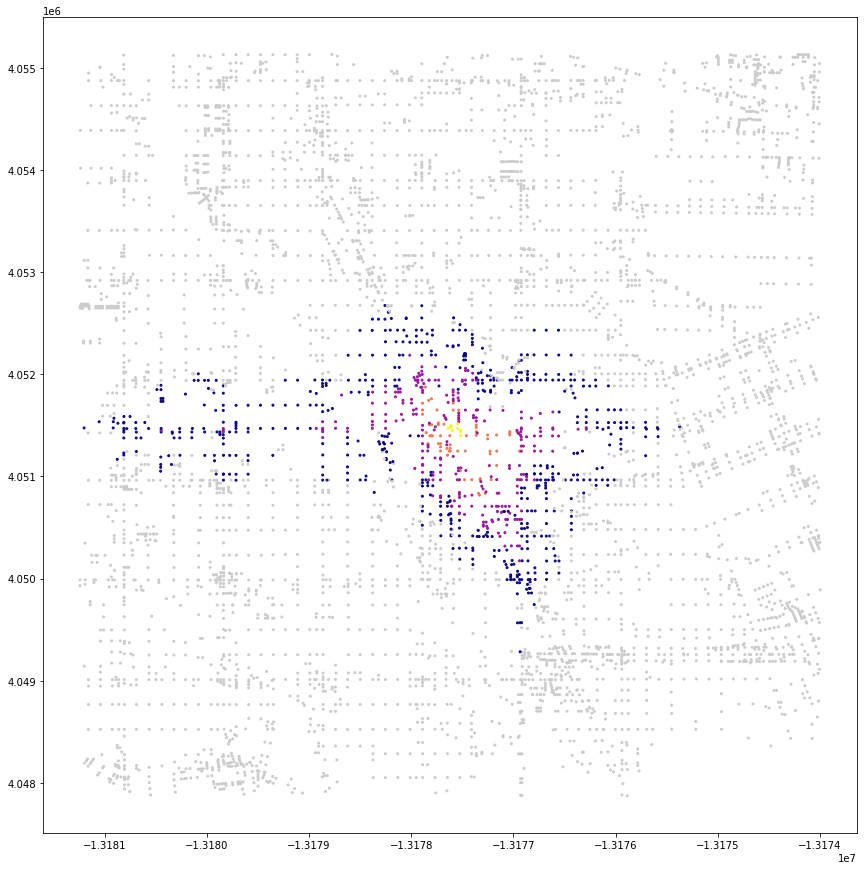

In [45]:
#now we map the node colors
nh_nodes.plot(figsize=(15,15),
               color=nh_nodes['color'],
               markersize=4)

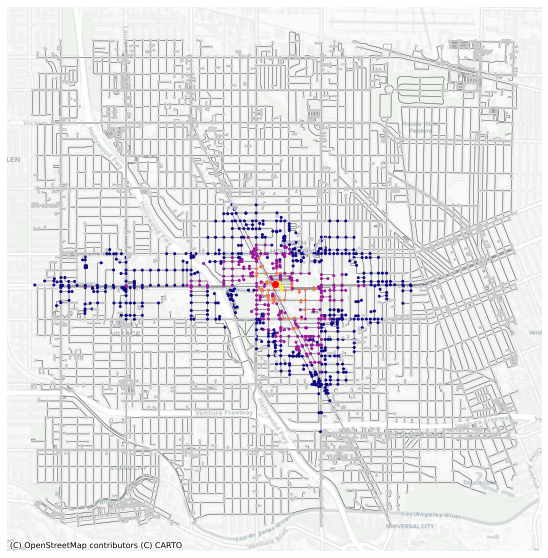

In [46]:
# a "full" map
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
nh_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
nh_nodes.plot(ax=ax,
               color=nh_nodes['color'],
               markersize=4, 
               zorder=20)

# add the center node in red also to ax
nh_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [47]:
# show only the points within 5 minutes
nh_nodes[nh_nodes['time']=='5 mins']

y             x  street_count         lon        lat  \
osmid                                                                         
2200740077  4.051399e+06 -1.317751e+07             3 -118.375631  34.168123   
2200740067  4.051451e+06 -1.317752e+07             3 -118.375631  34.168508   
2200740078  4.051437e+06 -1.317751e+07             4 -118.375630  34.168402   
7103976666  4.051451e+06 -1.317760e+07             3 -118.376386  34.168507   
6845597718  4.051469e+06 -1.317754e+07             1 -118.375896  34.168645   
7103976665  4.051482e+06 -1.317761e+07             4 -118.376489  34.168737   
6845597723  4.051517e+06 -1.317754e+07             1 -118.375890  34.168999   
7103976664  4.051492e+06 -1.317761e+07             5 -118.376507  34.168813   
6852240440  4.051471e+06 -1.317764e+07             1 -118.376747  34.168655   
7103976656  4.051491e+06 -1.317762e+07             1 -118.376537  34.168803   
7103976662  4.051496e+06 -1.317761e+07             1 -118.376505  34.168840   
7103976663  4.051493e+06 -1.317761e+07             1 -118.376526  34.168823   

           highway                           geometry    time    color  
osmid                                                                   
2200740077     NaN  POINT (-13177514.988 4051399.186)  5 mins  #f0f921  
2200740067     NaN  POINT (-13177515.021 4051451.012)  5 mins  #f0f921  
2200740078     NaN  POINT (-13177514.809 4051436.777)  5 mins  #f0f921  
7103976666     NaN  POINT (-13177598.967 4051450.971)  5 mins  #f0f921  
6845597718     NaN  POINT (-13177544.443 4051469.457)  5 mins  #f0f921  
7103976665     NaN  POINT (-13177610.511 4051481.835)  5 mins  #f0f921  
6845597723     NaN  POINT (-13177543.830 4051517.113)  5 mins  #f0f921  
7103976664     NaN  POINT (-13177612.492 4051492.034)  5 mins  #f0f921  
6852240440     NaN  POINT (-13177639.164 4051470.789)  5 mins  #f0f921  
7103976656     NaN  POINT (-13177615.843 4051490.702)  5 mins  #f0f921  
7103976662     NaN  POINT (-13177612.214 4051495.707)  5 mins  #f0f921  
7103976663     NaN  POINT (-13177614.641 4051493.433)  5 mins  #f0f921

In [48]:
# put it in a variable
nh_5 = nh_nodes[nh_nodes['time']=='5 mins']

<AxesSubplot:>

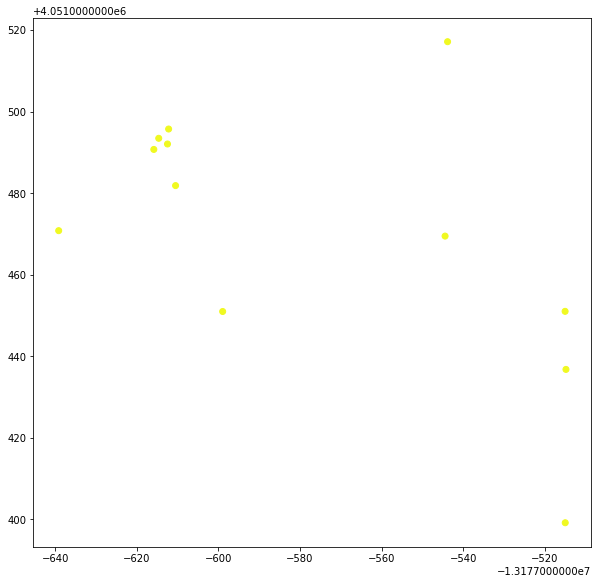

In [49]:
# plot it
nh_5.plot(figsize=(10,10),color=nh_5.color)

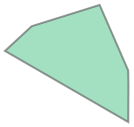

In [50]:
# combine all the points (unary_union) and create a convex hull polygon
nh_5.unary_union.convex_hull

NOw we use the dissolve function to group the points by different time periods.

In [51]:
isochrones = nh_nodes.dissolve("time")
isochrones

geometry             y  \
time                                                                       
10 mins  MULTIPOINT (-13177889.422 4051717.222, -131778...  4.050968e+06   
15 mins  MULTIPOINT (-13180448.011 4051452.048, -131798...  4.051943e+06   
20 mins  MULTIPOINT (-13181202.034 4051474.893, -131810...  4.049284e+06   
5 mins   MULTIPOINT (-13177639.164 4051470.789, -131776...  4.051399e+06   

                    x  street_count         lon        lat          highway  \
time                                                                          
10 mins -1.317741e+07             4 -118.374662  34.164919  traffic_signals   
15 mins -1.317789e+07             6 -118.379036  34.172163  traffic_signals   
20 mins -1.317693e+07             4 -118.370416  34.152397  traffic_signals   
5 mins  -1.317751e+07             3 -118.375631  34.168123             None   

           color  
time              
10 mins  #ed7953  
15 mins  #9c179e  
20 mins  #0d0887  
5 mins   #f0f921

In [52]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

time                                                  0
0  10 mins  POLYGON ((-13177331.911 4050817.708, -13177527...
1  15 mins  POLYGON ((-13176940.690 4050174.552, -13180448...
2  20 mins  POLYGON ((-13176934.434 4049283.676, -13180877...
3   5 mins  POLYGON ((-13177514.988 4051399.186, -13177639...

In [53]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

In [54]:
isochrones.head()

time                                           geometry
0  10 mins  POLYGON ((-13177331.911 4050817.708, -13177527...
1  15 mins  POLYGON ((-13176940.690 4050174.552, -13180448...
2  20 mins  POLYGON ((-13176934.434 4049283.676, -13180877...
3   5 mins  POLYGON ((-13177514.988 4051399.186, -13177639...

<AxesSubplot:>

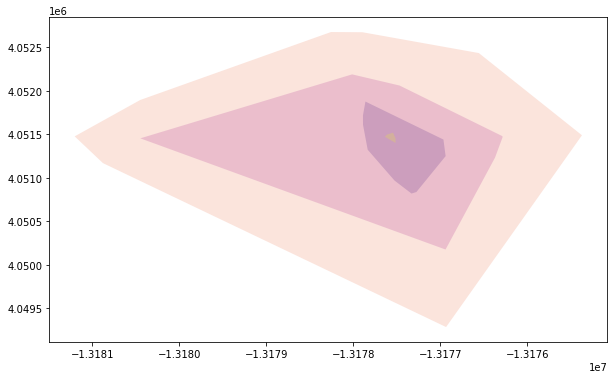

In [55]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

Nice! Curious to know why the west side is so much more accessible by bike than the other cardinal directions.

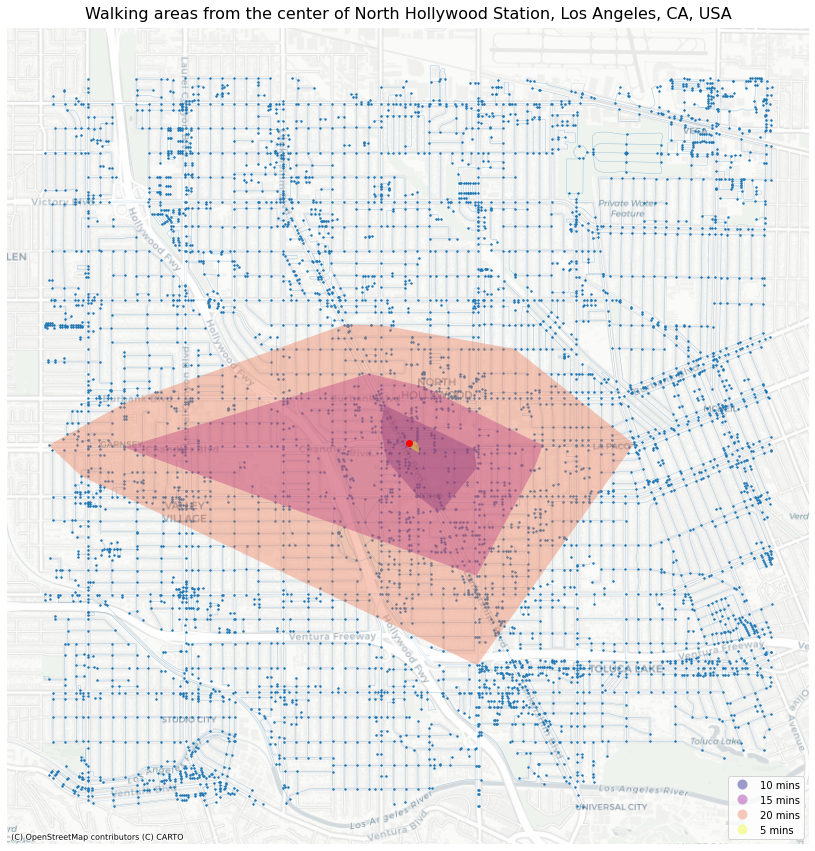

In [56]:
# set up the subplots
fig, ax = plt.subplots(figsize=(15,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
nh_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
nh_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=10)

# add the edges
nh_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from the center of ' + address,fontsize=16,pad=10)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

With the above isochrone map imposed above the basemap, we can see that the 101 Hollywood Freeway is a huge barrier for biking accessibility just west of NoHo station. The main road crossing underneath the 101 is Chandler Boulevard, which also carries the Orange Line BRT (Bus Rapid Transit) in its last eastbound stretch to  North Hollywood Station. What's intriguing about the biking access of this node is that there isn't a ton of area a biker can cover within five minutes.

## Creating "better" isochrones



In [57]:
# additional libraries for geometry shapes
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch

In [58]:
# function to create "better" isochrones
def make_iso_polys(NoHo, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(NoHo, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_nh = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_nh = nodes_nh.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_nh.loc[n_fr].geometry
            t = nodes_nh.loc[n_to].geometry
            edge_lookup = NoHo.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_nh.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

In [59]:
# call function to create "better" isochrones for NoHo
isochrone_polys = make_iso_polys(NoHo, edge_buff=25, node_buff=0, infill=True)

In [60]:
# Create an empty geopandas GeoDataFrame
better_isos = gpd.GeoDataFrame()
better_isos['geometry'] = None

In [61]:
# loop through the polygons and put them in a geodataframe
for i in range(len(isochrone_polys)):
    better_isos.loc[i,'geometry'] = isochrone_polys[i]
    better_isos.loc[i,'time'] =  str(trip_times[i]) + ' mins'
better_isos

geometry     time
0  POLYGON ((-13179916.790 4050999.571, -13179919...  20 mins
1  POLYGON ((-13178849.132 4051362.760, -13178850...  15 mins
2  POLYGON ((-13177715.510 4051224.210, -13177715...  10 mins
3  POLYGON ((-13177628.702 4051448.084, -13177630...   5 mins

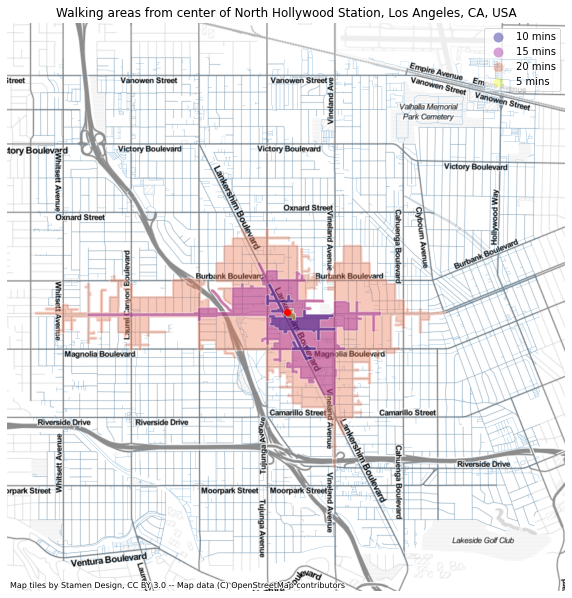

In [66]:
# create a beautiful map with all relevant layers
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
better_isos.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                edgecolor='white',
                 legend=True,
                zorder=20)

# add the center node in red
nh_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
# nh_nodes.plot(ax=ax, 
#                markersize=1, 
#                zorder=10)

# add the edges
nh_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from center of ' + address)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)